In [14]:
import pandas as pd
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

начнем с загрузки и изучения данных

In [15]:
customers = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/QXrVDUoQvFhIcg')
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


customer_id — позаказный идентификатор пользователя \
customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта) \
customer_zip_code_prefix —  почтовый индекс пользователя \
customer_city —  город доставки пользователя \
customer_state —  штат доставки пользователя

In [16]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [17]:
customers.isnull().sum() 

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

пропусков нет

In [18]:
orders = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/0zWmh1bYP6REbw')
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


order_id —  уникальный идентификатор заказа (номер чека) \
customer_id —  позаказный идентификатор пользователя \
order_status —  статус заказа \
order_purchase_timestamp —  время создания заказа \
order_approved_at —  время подтверждения оплаты заказа \
order_delivered_carrier_date —  время передачи заказа в логистическую службу \
order_delivered_customer_date —  время доставки заказа \
order_estimated_delivery_date —  обещанная дата доставки

преобразуем формат даты

In [19]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)
orders.dtypes 

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [20]:
orders.nunique() 

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [21]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

пропуски есть, предположительно они в отмененных и в незавершенных заказах \
проверим, есть ли пропуски в данных среди доставленных заказов

In [22]:
orders[orders.isnull().any(axis=1)].query("order_status == 'delivered'").head(17)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22


да, они есть, значит пропуски связаны не только с отменой заказа. \
Можем предположить, что пропуски в order_approved_at означают оплату наличными / ошибки в данных \
пропуски в order_delivered_carrier_date -- самовывоз заказа / ошибки в данных \
пропуски в order_delivered_customer_date скорее всего связаны с ошибками в данных

In [23]:
items = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg')
items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


order_id —  уникальный идентификатор заказа (номер чека) \
order_item_id —  идентификатор товара внутри одного заказа \
product_id —  ид товара (аналог штрихкода) \
seller_id — ид производителя товара \
shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике \
price —  цена за единицу товара \
freight_value —  вес товара

In [24]:
items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

можем заметить, что в этой таблице меньше уникальных order_id, чем в таблице orders, это говорит об ошибке в данных, мы не знаем содержимое этих заказов, либо эти заказы сформированы ошибочно

In [25]:
items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

пропусков нет

### 1. Найдем сколько у нас пользователей, которые совершили покупку только один раз

соединим таблицы пользователи и заказы по полю customer_id через inner, чтобы сразу исключить пропуски в данных, если они есть

In [26]:
num1 = orders.merge(customers, on='customer_id', how='inner')

In [27]:
num1.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
customer_unique_id               96096
customer_zip_code_prefix         14994
customer_city                     4119
customer_state                      27
dtype: int64

видим, что в таблице заказов 99441, а уникальных пользователей 96096

будем считать, что покупка -- заказ отгружен или уже доставлен, т.к. до отгрузки заказ можно отменить и в таком случае это не будет считаться покупкой

отфильтруем нашу таблицу, оставив в ней только заказы со статусами shipped и delivered, посмотрим на графике на распределение заказов

<AxesSubplot:xlabel='purchases', ylabel='Count'>

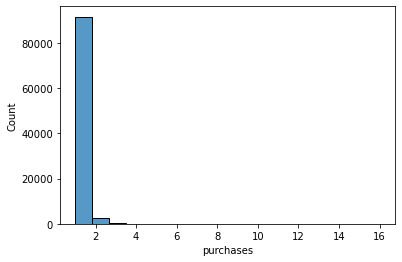

In [28]:
num1_1 = num1.query("order_status in ['shipped','delivered']") \
            .groupby('customer_unique_id', as_index=False) \
            .agg({'order_id':'count'}) \
            .rename(columns={'order_id':'purchases'})
sns.histplot(num1_1.purchases)

видим, что почти все пользователи совершили только одну покупку, посчитаем численно сколько это человек

In [29]:
num1_2 = num1_1.query('purchases == 1')
print(num1_2.shape[0], 'пользователей совершили только 1 покупку')

91538 пользователей совершили только 1 покупку


### 2. Найдем сколько заказов в месяц в среднем не доставляется по разным причинам (+ детализация по причинам)

стоит учесть, что месяц оформления заказа не всегда совпадает с месяцем доставки, запланированная дата доставки может отстоять от даты создания заказа по разному в зависимости от специфики конкретного товара, поэтому будет отталкиваться от order_purchase_timestamp -- даты оформления заказа \
создадим новый столбец, в который запишем месяцы оформления заказа

In [30]:
num2 = orders.copy()
num2['month'] = num2.order_purchase_timestamp.dt.to_period("M")

для начала посмотрим сколько всего заказов на текущий момент не доставлено

In [31]:
num2.query("order_status != 'delivered'") \
    .groupby('order_status', as_index=False) \
    .agg({'order_id':'count'})

,order_status,order_id
0,approved,2
1,canceled,625
2,created,5
3,invoiced,314
4,processing,301
5,shipped,1107
6,unavailable,609


будем считать, что недоставленный заказ -- в статусе canceled и unavailable, потому что остальные статусы говорят о том, что заказ в процессе и его планируется доставить

In [32]:
num2.query("order_status == 'canceled'").sort_values('order_delivered_customer_date').head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29,2016-10
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,2016-10
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30,2016-10
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,2016-10
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08,2016-10


заметим, что в данных есть отмененные заказы, у которых указана дата доставки, 
можем предположить, что в этом случае клиент получил заказ, а затем вернул его либо это ошибка в данных \
исключим их, т.к. эти заказы все же были доставлены

In [33]:
num2 = num2[num2.order_delivered_customer_date.isna()]

отберем статусы canceled и unavailable, сгруппируем по статусу и месяцу, посчитаем количество заказов и найдем среднее для каждого статуса

In [34]:
num2_1 = num2.query("order_status in ['canceled','unavailable']") \
            .groupby(['month','order_status'], as_index=False) \
            .agg({'order_id':'count'}) \
            .pivot(index='month', columns='order_status', values='order_id').mean().to_frame(name='mean')
print('в среднем в месяц не доставлено заказов по причинам:', '\n', num2_1)

в среднем в месяц не доставлено заказов по причинам: 
                    mean
order_status           
canceled      25.791667
unavailable   29.000000


### 3. По каждому товару определим, в какой день недели товар чаще всего покупается.

чтобы оставить только товары, которые были проданы, соединим таблицы заказов и товаров \
выделим из даты оформления заказа день недели и оставим только заказы, которые подходят под определение покупки

In [35]:
num3 = items.merge(orders, on='order_id', how='inner')
num3['weekday'] = num3.order_purchase_timestamp.dt.day_name()
num3.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,Saturday


используем определение покупки из пункта 1. Датой покупки будем считать дату оформления заказа, т.к дата оплаты есть не у всех, а мы предполагаем, что это оплата наличными

сгруппируем по айди продукта и найдем моду для каждого товара -- это и будет днем недели, в который товар больше всего продавался

In [36]:
num3.query("order_status in ['shipped','delivered']") \
    .groupby(['product_id'])['weekday'] \
    .agg(pd.Series.mode) \
    .to_frame(name='mode')

,mode
product_id,
00066f42aeeb9f3007548bb9d3f33c38,Sunday
00088930e925c41fd95ebfe695fd2655,Tuesday
0009406fd7479715e4bef61dd91f2462,Thursday
000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...
fff6177642830a9a94a0f2cba5e476d1,"[Saturday, Sunday]"
fff81cc3158d2725c0655ab9ba0f712c,Monday
fff9553ac224cec9d15d49f5a263411f,Friday


### 4. Найдем сколько у каждого из пользователей в среднем покупок в неделю (по месяцам). Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

соединим таблицы пользователи и заказы по полю customer_id  \
добавим столбец месяца, который определяется по дате оформления заказа и столбец с количеством дней в месяце

In [37]:
num4 = orders.merge(customers, on='customer_id', how='inner')
num4['month'] = num4.order_purchase_timestamp.dt.to_period("M")
num4['days_in_month'] = num4.order_purchase_timestamp.dt.days_in_month
num4.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month,days_in_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,31
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,31
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,30
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,28


будем считать, что среднее кол-во покупок в неделю в месяце = кол-во покупок в месяц / кол-во недель в месяц \
кол-во недель учтем как кол-во дней в месяц/7

используем определение покупки из п.1, сгруппируем айди клиента и месяцу, посчитаем кол-во заказов

In [38]:
num4 = num4.query("order_status in ['shipped','delivered']") \
            .groupby(['customer_unique_id','month','days_in_month'], as_index=False) \
            .agg({'order_id':'count'}) 
num4

,customer_unique_id,month,days_in_month,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,31,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,31,1
2,0000f46a3911fa3c0805444483337064,2017-03,31,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,31,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,30,1
...,...,...,...,...
96260,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,30,1
96261,fffea47cd6d3cc0a88bd621562a9d061,2017-12,31,1
96262,ffff371b4d645b6ecea244b27531430a,2017-02,28,1
96263,ffff5962728ec6157033ef9805bacc48,2018-05,31,1


добавим столбец со средним числом покупок и посмотрим на сводную таблицу

In [39]:
num4['mean_purchases'] = num4.order_id/(num4.days_in_month/7)
num4.pivot(index='customer_unique_id', columns='month', values='mean_purchases')

month,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN
0000b849f77a49e4a4ce2b2a4ca5be3f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN
0000f46a3911fa3c0805444483337064,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000f6ccb0745a6a4b88665a16c9f078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0004aac84e0df4da2b147fca70cf8255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.233333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffea47cd6d3cc0a88bd621562a9d061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.225806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffff371b4d645b6ecea244b27531430a,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


за счет того, что большинство пользователей сделали всего лишь одну покупку, таблица выглядит максимально нечитабельной, поэтому исключим их

In [40]:
num4.merge(num1_1, on='customer_unique_id', how='inner') \
            .query("mean_purchases != 1") \
            .pivot(index='customer_unique_id', columns='month', values='mean_purchases')

month,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN
0000b849f77a49e4a4ce2b2a4ca5be3f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN
0000f46a3911fa3c0805444483337064,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000f6ccb0745a6a4b88665a16c9f078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0004aac84e0df4da2b147fca70cf8255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.233333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffea47cd6d3cc0a88bd621562a9d061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.225806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffff371b4d645b6ecea244b27531430a,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


таблица по прежнему плохо читается, поэтому уйдем от вида сводной таблицы и вернемся к обычной(пользователей с одной покупкой не исключаем)

In [41]:
num4 = num4.groupby(['customer_unique_id','month']) \
            .agg({'mean_purchases':'sum'}) \
            .sort_values('mean_purchases', ascending=False)
num4

,,mean_purchases
customer_unique_id,month,
12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,1.354839
a239b8e2fbce33780f1f1912e2ee5275,2017-02,1.000000
b4e4f24de1e8725b74e4a1f4975116ed,2018-02,1.000000
3e43e6105506432c953e165fb2acf44c,2018-02,1.000000
b08fab27d47a1eb6deda07bfd965ad43,2017-09,0.933333
...,...,...
6ac3770209c7cf2e5b54d47abb41063a,2018-08,0.225806
6ac37d07d28f224d58ca5c8d595e91c9,2018-01,0.225806
6ac3c7ce164d85523c71a91afac8f906,2018-01,0.225806


теперь в таблице можем посмотреть для каждого клиента, который совершил больше одной покупки сколько в среднем покупок в неделю он делал в определенный месяц.

### 5. Проведем когортный анализ пользователей. В период с января по декабрь нужно выявить когорту с самым высоким retention на 3й месяц.

посмотрим на дату первого заказа

In [42]:
orders.order_purchase_timestamp.sort_values() 

4541    2016-09-04 21:15:19
4396    2016-09-05 00:15:34
10071   2016-09-13 15:24:19
30710   2016-09-15 12:16:38
83078   2016-10-02 22:07:52
                ...        
50387   2018-09-29 09:13:03
88500   2018-10-01 15:30:09
31891   2018-10-03 18:55:29
68373   2018-10-16 20:16:02
60938   2018-10-17 17:30:18
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]

Поскольку необходимо выявить когорту в период с января по декабрь, то можем рассчитать эти данные для когорт, у которых первая покупка была не ранее 1 января 2017, т.к информация за полный год нам известна только в 2017 году. Так же необходимо обрезать данные сверху по 31 декабря 2017, т.к. необходимо расчитать ретеншн для когорт периода январь-декабрь

соединим таблицы пользователи и заказы по полю customer_id \
воспользуемся нашим определением покупки

In [43]:
num5 = orders.merge(customers, on='customer_id', how='inner').query("order_status in ['shipped','delivered']")
num5.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


сгруппируем по клиентам, найдем у каждого дату первой покупки \
приведем к формату месяца, т.к ищем ретеншн по месяцам \
отрежем данные по январю 2017(начало) и по декабрю 2017(последняя когорта в период 2017)

In [44]:
num5_1 = num5.groupby('customer_unique_id', as_index=False) \
            .agg({'order_purchase_timestamp':'min'}) \
            .rename(columns = {'order_purchase_timestamp':'first_order'}) \
            .sort_values('first_order')

num5_1['first_order'] = num5_1.first_order.dt.to_period("M")

num5_1 = num5_1.query("first_order >= '2017-01' & first_order <= '2017-12'")

добавим месяц покупки

In [45]:
num5_1 = num5_1.merge(num5, on='customer_unique_id', how='inner')
num5_1['order_purchase_timestamp'] =  num5_1.order_purchase_timestamp.dt.to_period("M")
num5_1.head()

,customer_unique_id,first_order,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,83e7958a94bd7f74a9414d8782f87628,2017-01,b95a0a8bd30aece4e94e81f0591249d8,ff3c6d35b4927c9b965aa6a68dcf56e4,delivered,2017-01,2017-01-07 03:35:37,2017-01-11 16:22:53,2017-01-17 15:38:58,2017-02-13,80030,curitiba,PR
1,83e7958a94bd7f74a9414d8782f87628,2017-01,205d7052a6505124d200f6fea6b423bc,d020d4abe6475a8382f53d763fe24a65,delivered,2017-01,2017-01-07 03:44:23,2017-01-11 16:09:00,2017-01-17 17:52:31,2017-02-13,80030,curitiba,PR
2,83e7958a94bd7f74a9414d8782f87628,2017-01,3ce4038922670fead496aeae61a8a393,5da810af4515e4470379a90fcf246a15,delivered,2017-01,2017-01-07 03:44:23,2017-01-11 15:37:55,2017-01-16 14:04:35,2017-02-13,80030,curitiba,PR
3,83e7958a94bd7f74a9414d8782f87628,2017-01,0bda8164c1a12b6a388ebec8559ee287,3f402674c608ea67085eb5e0ec4d96ef,delivered,2017-01,2017-01-07 03:45:47,2017-01-11 16:09:00,2017-01-16 17:27:34,2017-02-13,80030,curitiba,PR
4,728e4a7d0db4845270091ded0923c71f,2017-01,7a18a504c1a4b32d883e68de2e1a7db0,e6bee29442c761ff0dfb9a4414922a5c,delivered,2017-01,2017-01-07 03:44:08,2017-01-11 15:35:53,2017-01-16 15:43:29,2017-02-13,80540,curitiba,PR


сформируем таблицу для подсчета ретеншн -- сгрупируем по месяцу первого заказа и по месяцам остальных заказов,
посчитаем кол-во заказов для каждой когорты

In [46]:
num5_2 = num5_1.groupby(['first_order','order_purchase_timestamp'], as_index=False) \
                .agg({'customer_unique_id':'count'}) \
                .pivot(index='first_order', columns='order_purchase_timestamp', values='customer_unique_id')
#переименуем колонки в номер месяца
lst = []
for i in range(num5_2.shape[1]):
    lst.append(i)
num5_2.columns = lst
num5_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
first_order,,,,,,,,,,,,,,,,,,,,
2017-01,765.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,NaN,1.0
2017-02,NaN,1671.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN
2017-03,NaN,NaN,2585.0,14.0,9.0,12.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,4.0
2017-04,NaN,NaN,NaN,2331.0,15.0,6.0,5.0,7.0,6.0,9.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,4.0
2017-05,NaN,NaN,NaN,NaN,3572.0,18.0,18.0,13.0,11.0,14.0,17.0,5.0,9.0,11.0,9.0,12.0,10.0,1.0,8.0,10.0


сдвинем строки, чтобы привести к единому началу отсчета

In [47]:
for i in range(num5_2.shape[0]):
    num5_2.iloc[i] = num5_2.iloc[i].shift(periods=-i)
num5_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
first_order,,,,,,,,,,,,,,,,,,,,
2017-01,765.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,NaN,1.0
2017-02,1671.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN
2017-03,2585.0,14.0,9.0,12.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2331.0,15.0,6.0,5.0,7.0,6.0,9.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,4.0,NaN,NaN,NaN
2017-05,3572.0,18.0,18.0,13.0,11.0,14.0,17.0,5.0,9.0,11.0,9.0,12.0,10.0,1.0,8.0,10.0,NaN,NaN,NaN,NaN


посчитаем ретеншн для каждого месяца

In [48]:
first = num5_2.iloc[:,0].copy()
for i in range(num5_2.shape[1]):
        num5_2.iloc[:,i] = num5_2.iloc[:,i] / first
num5_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
first_order,,,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.003922,0.002614,0.001307,0.003922,0.001307,0.003922,0.001307,0.001307,NaN,0.003922,0.001307,0.006536,0.003922,0.001307,0.001307,0.002614,0.003922,NaN,0.001307
2017-02,1.0,0.002394,0.002992,0.001197,0.004189,0.001197,0.002394,0.001795,0.001197,0.001795,0.001197,0.002992,0.001197,0.001795,0.001197,0.000598,0.000598,0.001795,NaN,NaN
2017-03,1.0,0.005416,0.003482,0.004642,0.003482,0.001547,0.001547,0.003095,0.003095,0.000774,0.003482,0.001161,0.001934,0.001161,0.001547,0.002321,0.000774,0.001547,NaN,NaN
2017-04,1.0,0.006435,0.002574,0.002145,0.003003,0.002574,0.003861,0.003003,0.003003,0.001716,0.002574,0.000858,0.000429,0.000429,0.000858,0.000858,0.001716,NaN,NaN,NaN
2017-05,1.0,0.005039,0.005039,0.003639,0.003080,0.003919,0.004759,0.001400,0.002520,0.003080,0.002520,0.003359,0.002800,0.000280,0.002240,0.002800,NaN,NaN,NaN,NaN
2017-06,1.0,0.004461,0.003824,0.003824,0.002549,0.003505,0.003505,0.002231,0.001275,0.002231,0.002868,0.003187,0.001593,0.001275,0.002231,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005676,0.003354,0.002322,0.003354,0.002064,0.003096,0.001032,0.002064,0.002838,0.002064,0.003096,0.001290,0.002580,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006953,0.003836,0.002637,0.003357,0.005754,0.002877,0.002637,0.001439,0.001439,0.002398,0.001918,0.001199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006816,0.005355,0.003895,0.004382,0.003165,0.002191,0.002434,0.002921,0.001704,0.002678,0.000730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


для наглядной визуализации умножим все на 100

Text(114.0, 0.5, 'когорта')

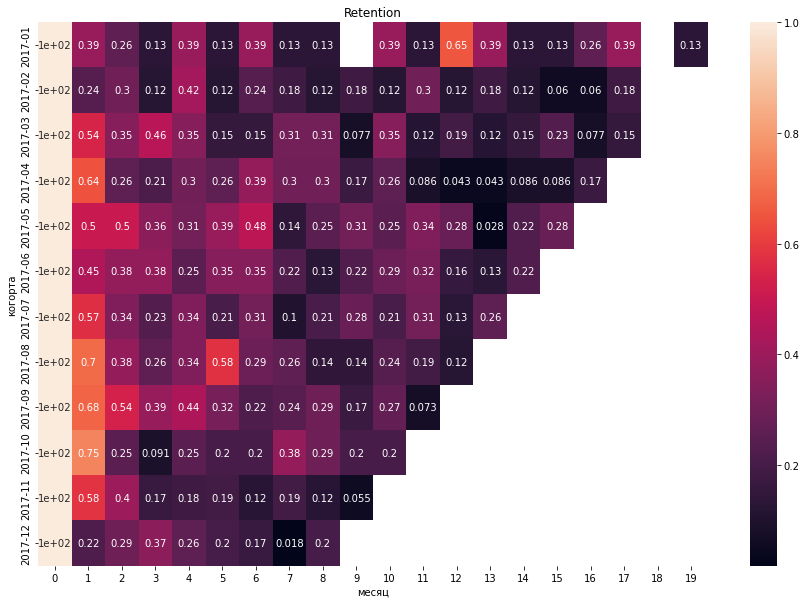

In [50]:
num5_3 = num5_2.mul(100)
plt.figure(figsize=(15,10))
sns.heatmap(num5_3, vmax=1, annot=True)
plt.title('Retention')
plt.xlabel('месяц')
plt.ylabel('когорта')

найдем когорту с самым высоким ретеншн на 3 месяц

In [51]:
result = num5_2[3].sort_values(ascending=False).to_frame().head(1)
print('когорта с наибольшим ретеншн --', result)

когорта с наибольшим ретеншн --                     3
first_order          
2017-03      0.004642


### 6. Построим RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации выберем следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Для каждого RFM-сегмента построим границы метрик recency, frequency и monetary для интерпретации этих кластеров. 

здесь нам понадобятся все три таблицы, объединим их \
воспользуемся определением покупки

In [55]:
num6 = orders.merge(customers, on='customer_id', how='inner')
num6 = num6.merge(items, on='order_id', how='inner')
num6 = num6.query("order_status in ['shipped','delivered']")
num6.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


в качестве текущей даты будем использовать + 1 день от последней записи в данных

In [56]:
now = num6.order_purchase_timestamp.max() + timedelta(days = 1)
now

Timestamp('2018-09-04 09:06:57')

recency -- количество дней с последнего заказа \
frequency -- количество заказов\
monetary -- общая сумма заказов

посчитаем метрики для каждого пользователя

In [57]:
recency = (now - num6.groupby('customer_unique_id').agg({'order_purchase_timestamp':'max'})).reset_index().rename(columns={'order_purchase_timestamp':'recency'})
recency['recency'] = recency.recency.dt.days #оставим  целое кол-во дней
frequency = num6.groupby('customer_unique_id').agg({'order_id':'count'}).reset_index().rename(columns={'order_id':'frequency'})
monetary = num6.groupby('customer_unique_id').agg({'price':'sum'}).reset_index().rename(columns={'price':'monetary'})

добавим в нашу таблицу и оставим только по одной записи для каждого пользователя, удалим ненужные столбцы

In [58]:
num6_1 = num6.merge(recency, on='customer_unique_id', how='inner')
num6_1 = num6_1.merge(frequency, on='customer_unique_id', how='inner')
num6_1 = num6_1.merge(monetary, on='customer_unique_id', how='inner')
num6_1 = num6_1.drop_duplicates('customer_unique_id')
num6_1 = num6_1[['customer_unique_id','recency','frequency','monetary']].copy()
num6_1

,customer_unique_id,recency,frequency,monetary
0,7c396fd4830fd04220f754e42b4e5bff,336,2,65.38
2,af07308b275d755c9edb36a90c618231,41,1,118.70
3,3a653a41f6f9fc3d2a113cf8398680e8,27,1,159.90
4,7c142cf63193a1473d2e66489a9ae977,289,1,45.00
5,72632f0f9dd73dfee390c9b22eb56dd6,202,1,19.90
...,...,...,...,...
111376,6359f309b166b0196dbf7ad2ac62bb5a,543,1,72.00
111377,da62f9e57a76d978d02ab5362c509660,209,1,174.90
111378,737520a9aad80b3fbbdad19b66b37b30,372,1,205.99
111379,5097a5312c8b157bb7be58ae360ef43c,238,2,359.98


разобьем по квинтилям метрики

In [59]:
num6_1.quantile([0.2, 0.4, 0.6,0.8])

,recency,frequency,monetary
0.2,97.0,1.0,39.9
0.4,182.0,1.0,69.9
0.6,273.0,1.0,109.9
0.8,388.0,1.0,179.9


In [60]:
print (num6_1.query('frequency == 1').shape[0] / num6_1.shape[0], 'покупателей сделали 1 заказ')
print (num6_1.query('frequency == 2').shape[0] / num6_1.shape[0], 'покупателей сделали 2 заказ')

0.875823640331363 покупателей сделали 1 заказ
0.09416513061717409 покупателей сделали 2 заказ


разбивать количество покупок таким способом оказалось нецелесообразно, т.к 88% покупателей совершили только 1 заказ, еще 9% -- 2 заказа, 3-21 заказов -- оставшиеся

выделим покупателей с 1 и 2 покупками в отдельные категории, посмотрим на квантили оставшихся данных

In [63]:
num6_1.query('frequency > 2').quantile([0.25,0.5,0.75])

,recency,frequency,monetary
0.25,116.0,3.0,119.60
0.50,214.0,3.0,201.98
0.75,334.0,4.0,364.30


группы все еще получаются не очень логичными, 3-4 так же стоит выделить в отдельную категорию, посмотрим на распределение >4

In [68]:
num6_1.query('frequency > 4').quantile([0.25,0.5,0.75])

,recency,frequency,monetary
0.25,107.0,5.0,172.14
0.50,187.0,6.0,299.90
0.75,306.0,6.0,599.95


выделим в отдельную категорию 5-6

In [69]:
num6_1.query('frequency > 6').quantile([0.25,0.5,0.75]) 

,recency,frequency,monetary
0.25,112.0,7.0,309.385
0.50,171.0,8.0,559.870
0.75,281.0,11.0,989.665


добавим в прошлую категорию 7 заказов и отдельно выделим категорию >=8

посмотрим еще раз на распределение заказов, чтобы окончательно сформировать шкалы

In [70]:
num6_1.frequency.value_counts()

1     82676
2      8889
3      1660
4       624
5       241
6       193
7        45
8        16
11       11
10       11
9        10
12        9
14        3
15        2
13        2
20        2
16        1
18        1
24        1
21        1
Name: frequency, dtype: int64

распределим категории следующим образом: 1, 2, 3-4, 5-7, 8+

приведем к рангам значения метрик

In [71]:
qr = num6_1.recency.quantile([0.2, 0.4, 0.6, 0.8])
def recency(x):
    if x <= qr[0.2]:
        return 5
    elif x <= qr[0.4]:
        return 4
    elif x <= qr[0.6]:
        return 3
    elif x <= qr[0.8]:
        return 2
    else:
        return 1

def frequency(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif 2 < x <= 4:
        return 3
    elif 4 < x <= 7:
        return 4
    else:
        return 5

qm = num6_1.monetary.quantile([0.2, 0.4, 0.6, 0.8]) 
def monetary(x):
    if x <= qm[0.2]:
        return 1
    elif x <= qm[0.4]:
        return 2
    elif x <= qm[0.6]:
        return 3
    elif x <= qm[0.8]:
        return 4
    else:
        return 5


num6_1['recency'] = num6_1['recency'].apply(recency)
num6_1['frequency'] = num6_1['frequency'].apply(frequency)
num6_1['monetary'] = num6_1['monetary'].apply(monetary)

добавим оценку RFM и посмотрим на итоговую таблицу

In [72]:
num6_1['RFM'] = num6_1.recency.astype("string") + num6_1.frequency.astype("string") + num6_1.monetary.astype("string")
num6_1

,customer_unique_id,recency,frequency,monetary,RFM
0,7c396fd4830fd04220f754e42b4e5bff,2,2,2,222
2,af07308b275d755c9edb36a90c618231,5,1,4,514
3,3a653a41f6f9fc3d2a113cf8398680e8,5,1,4,514
4,7c142cf63193a1473d2e66489a9ae977,2,1,2,212
5,72632f0f9dd73dfee390c9b22eb56dd6,3,1,1,311
...,...,...,...,...,...
111376,6359f309b166b0196dbf7ad2ac62bb5a,1,1,3,113
111377,da62f9e57a76d978d02ab5362c509660,3,1,4,314
111378,737520a9aad80b3fbbdad19b66b37b30,2,1,5,215
111379,5097a5312c8b157bb7be58ae360ef43c,3,2,5,325


In [73]:
num6_1.value_counts('RFM').sort_values(ascending=False) / num6_1.RFM.count()

RFM
111    0.041908
311    0.040891
212    0.040817
511    0.040075
112    0.039503
         ...   
151    0.000011
153    0.000011
552    0.000011
554    0.000011
241    0.000011
Length: 110, dtype: float64

у нас присутствуют 110 типов из 125 возможных

In [74]:
num6_1.query("recency >= 4 & frequency <=2 & monetary <=2").shape[0] / num6_1.shape[0] 

0.16145469183669145

In [75]:
num6_1.query("recency <= 2 & frequency >=4 & monetary >=4").shape[0] / num6_1.shape[0] 

0.0015996101612322294

In [79]:
num6_1.query("recency <= 2 & frequency <= 2 & monetary <= 2").shape[0] / num6_1.shape[0] 

0.16854170639208457

In [77]:
num6_1.query("recency >= 4 & frequency > =4 & monetary >= 4").shape[0] / num6_1.shape[0] 

0.002531833301552999

In [78]:
num6_1.query("recency == 5 & frequency == 5 & monetary == 5").shape[0] / num6_1.shape[0] 

0.00012712133731646857

In [80]:
num6_1.query("RFM == '555'")

,customer_unique_id,recency,frequency,monetary,RFM
2854,8d50f5eadf50201ccdcedfb9e2ac8455,5,5,5,555
3513,1f98d2384ff7a372e6a2d3bb75cbcd54,5,5,5,555
6355,ca77025e7201e3b30c44b472ff346268,5,5,5,555
8679,aebdb8f05f5ebf99f858c1a75fb7035a,5,5,5,555
12776,07ff81a9676efa0286ddd3f09e7c0063,5,5,5,555
19621,6469f99c1f9dfae7733b25662e7f1782,5,5,5,555
19883,b2e9a05d23ea17713b5d7799f2004f8e,5,5,5,555
29065,33176de67c05eeed870fd49f234387a0,5,5,5,555
29979,dc813062e0fc23409cd255f7f53c7074,5,5,5,555
43442,c8460e4251689ba205045f3ea17884a1,5,5,5,555


Результаты анализа:
больше всего покупателей с оценкой 1,1,1(спящие) - последняя покупка была давно, всего покупок 2, небольшой суммарный чек (их 16,8%) \
довольно много покупателей с оценкой 4-5,1-2,1-2(новички) - в последнее время совершали покупки, небольше кол-во покупок и суммарный чек, т.к они только недавно заметили наш продукт (их в сумме 16,1%) \
покупателей с оценками 4-5,4-5,4-5(лояльные) -делают частые покупки на крупные суммы (их 1%) \
в зоне риска менее 1% покупателей(оценки 1-2, 4-5,4-5) -- ранее часто тратили большие суммы, но давно ничего не покупали \
на грани так же менее 1% покупателей(оценки 2,2,2) \
покупателей с оценками 5,5,5(чемпионы) -- всего 12 человек \
\
Таким образом можно предположить, что наш магазин только набирает обороты, ранее покупатели были в большинстве не активными, однако появляется больше новичков. Так же стоит отметить, что довольно много пользователей совершали одну покупку и не возвращались. Поэтому стоит активно работать над маркетингом для них